<a href="https://colab.research.google.com/github/InSpira4/CS5617-DataScienceProject/blob/sugi/Descriptive_Sugi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Natera.csv');
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,1/7/2019,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
1,104453,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,1/7/2019,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
2,104454,1/2/2019,NCS,$795.00,$249.00,$0.00,$249.00,$546.00,SP - SELF PAY,99999,1/7/2019,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,$0.00,$0.00,$0.00,1
3,104496,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,1/7/2019,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1
4,104497,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,1/7/2019,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1


In [0]:
cols = ['Payments', 'Charges', 'Insurance Payment', 'Patient Payment', 'Writeoffs', 'Insurance Bal', 'Patient Bal', 'Allowed Amount']
for col in cols:
  df[col] = pd.to_numeric(df[col].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('(','')).apply(lambda x: x.replace(')','')))

In [0]:
cols = ['Date of Service', 'Date of Entry', 'Payment Post Date', 'First Billed Date']
for col in cols:
  df[col] = pd.to_datetime(df[col], errors='coerce')

In [0]:
cols = ['Ticket Number', 'Carrier Code', 'FinancialClass', 'CPT', 'NPI', 'Ordering Clinic', 'Denied Code', 'Provider Profile']
for col in cols:
  df[col] = df[col].astype('str')

In [0]:
def checkStatus(row):
  if(row['Denied Code'].strip() == '-'  and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return True
  elif(row['Denied Code'].strip() != '-' and row['Payment Post Date'].date() > row['Date of Service'].date()):
    return False
  else:
    return None
df['accepted'] = df.apply(lambda row: checkStatus(row), axis=1)

In [64]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
0,104452,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-22,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
1,104453,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-24,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
2,104454,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,2019-01-07,2019-02-10,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,1,True
3,104496,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-28,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
4,104497,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-30,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True


In [65]:
df.corr(method ='pearson') 

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count
Charges,1.000000,0.208528,0.198686,0.066846,0.492110,0.559216,0.384802,-0.071715,NaN
Payments,0.208528,1.000000,0.981083,0.176778,0.314464,-0.098623,-0.038002,0.331976,NaN
Insurance Payment,0.198686,0.981083,1.000000,-0.017107,0.291712,-0.092588,-0.033433,0.336650,NaN
Patient Payment,0.066846,0.176778,-0.017107,1.000000,0.141020,-0.038633,-0.026292,0.002992,NaN
Writeoffs,0.492110,0.314464,0.291712,0.141020,1.000000,-0.192298,-0.073470,0.074842,NaN
Insurance Bal,0.559216,-0.098623,-0.092588,-0.038633,-0.192298,1.000000,-0.159482,-0.154776,NaN
Patient Bal,0.384802,-0.038002,-0.033433,-0.026292,-0.073470,-0.159482,1.000000,-0.057735,NaN
Allowed Amount,-0.071715,0.331976,0.336650,0.002992,0.074842,-0.154776,-0.057735,1.000000,NaN
Case Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.corr(method ='kendall') 

,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,Insurance Bal,Patient Bal,Allowed Amount,Case Count
Charges,1.000000,0.059643,0.038721,0.060145,0.184642,0.220420,0.150847,-0.025493,NaN
Payments,0.059643,1.000000,0.940882,0.282584,0.464715,-0.298644,-0.089334,0.509951,NaN
Insurance Payment,0.038721,0.940882,1.000000,-0.039976,0.429472,-0.283826,-0.075130,0.525332,NaN
Patient Payment,0.060145,0.282584,-0.039976,1.000000,0.160747,-0.087313,-0.055414,0.028119,NaN
Writeoffs,0.184642,0.464715,0.429472,0.160747,1.000000,-0.472288,0.041144,0.384831,NaN
Insurance Bal,0.220420,-0.298644,-0.283826,-0.087313,-0.472288,1.000000,-0.503083,-0.347402,NaN
Patient Bal,0.150847,-0.089334,-0.075130,-0.055414,0.041144,-0.503083,1.000000,0.089637,NaN
Allowed Amount,-0.025493,0.509951,0.525332,0.028119,0.384831,-0.347402,0.089637,1.000000,NaN
Case Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [0]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

In [0]:
def compareColsWithClaimAcceptance(colName):
  yes = []
  no = []
  labels = df[colName].unique()
  count = df
  for label in labels:
      yes.append(df[df[colName] == label].accepted.sum())
      no.append(df[df[colName] == label].accepted.count() - df[df[colName] == label].accepted.sum())
  raw_data = {'labels': labels, 'accepted': yes, 'deineid': no}
  fc_compared = pd.DataFrame(raw_data)
  fc_compared.plot.bar(x='labels', rot=0, figsize=(30,10))
  return labels, yes, no

Compare Descrete varibles with claim acceptance

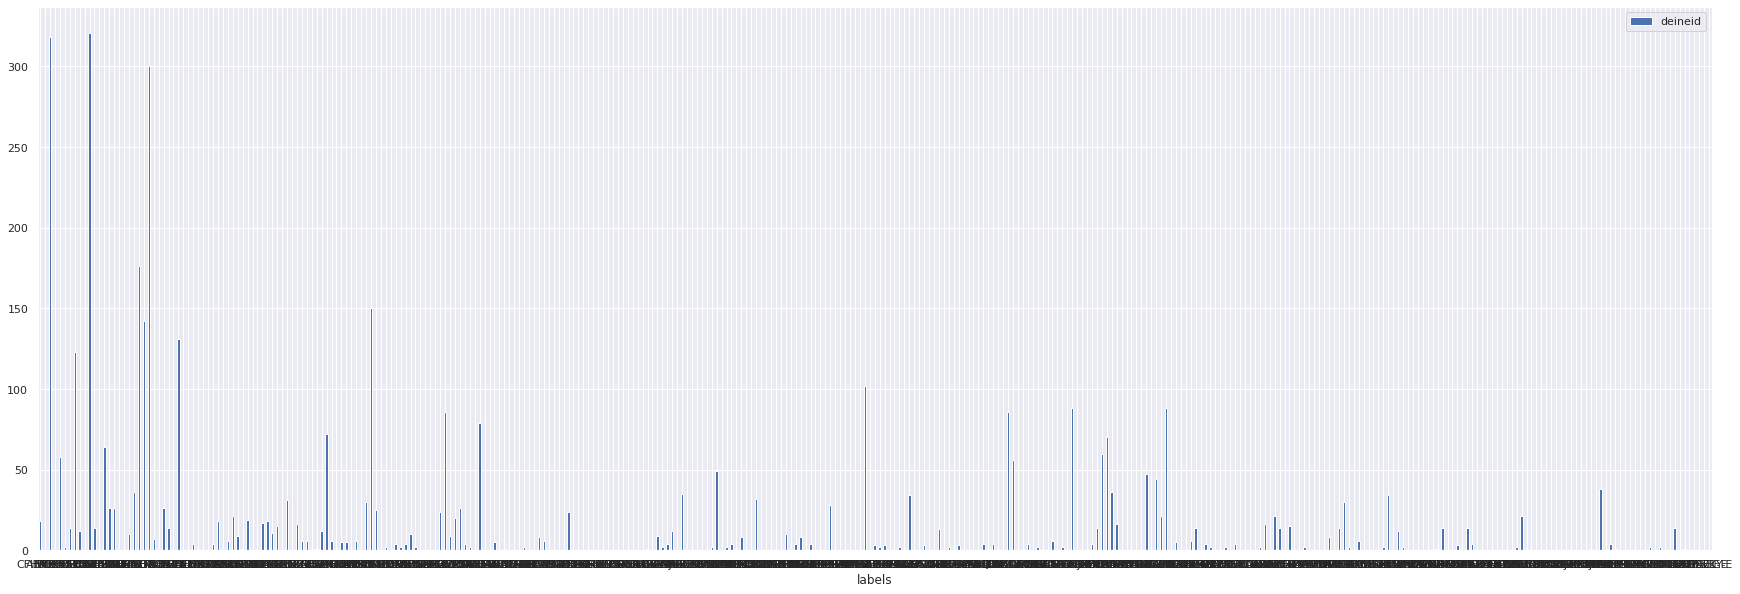

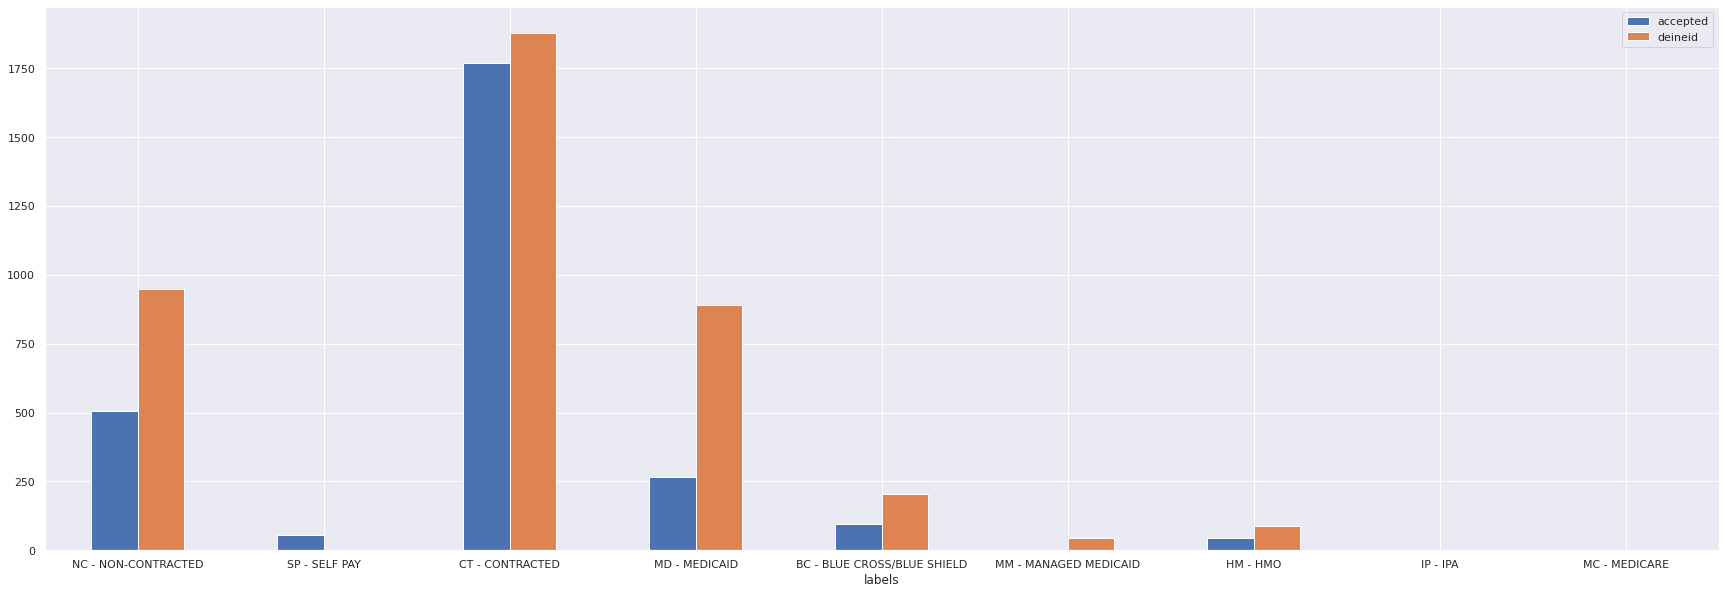

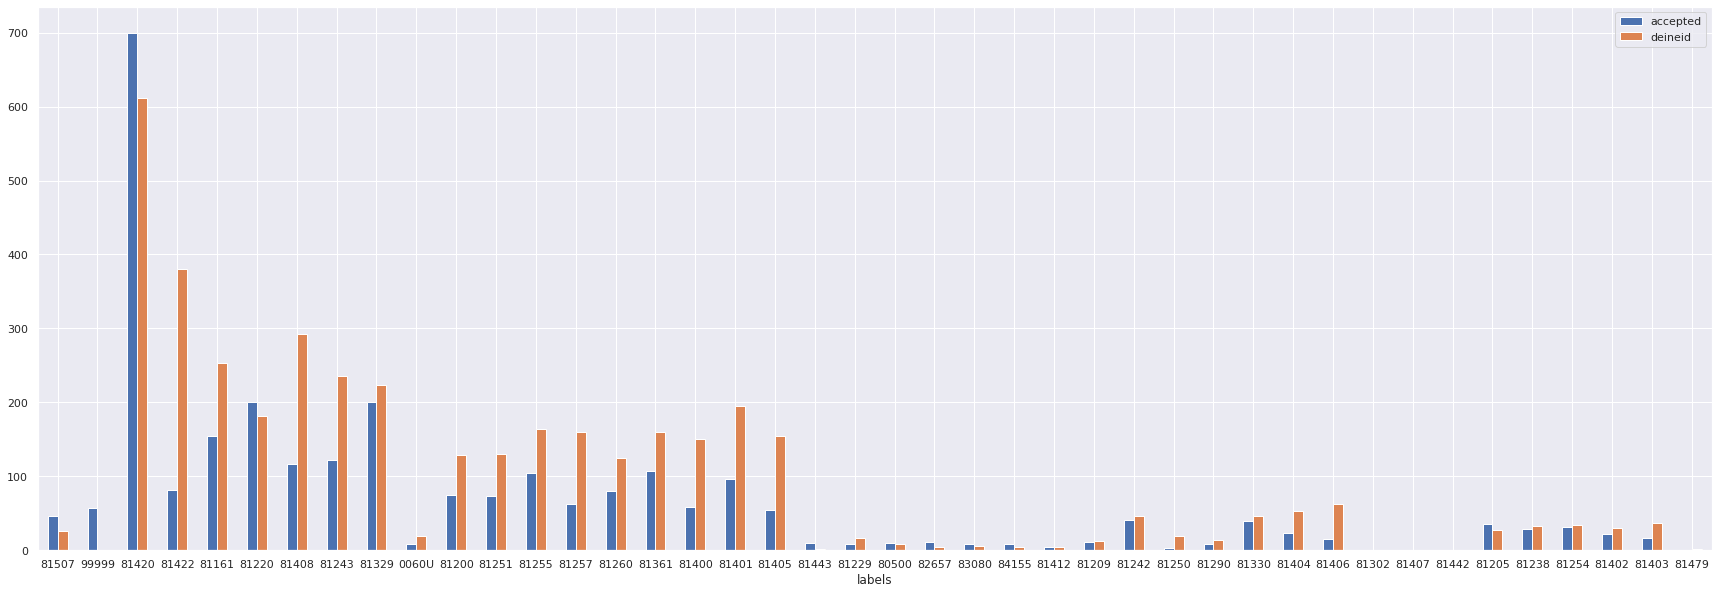

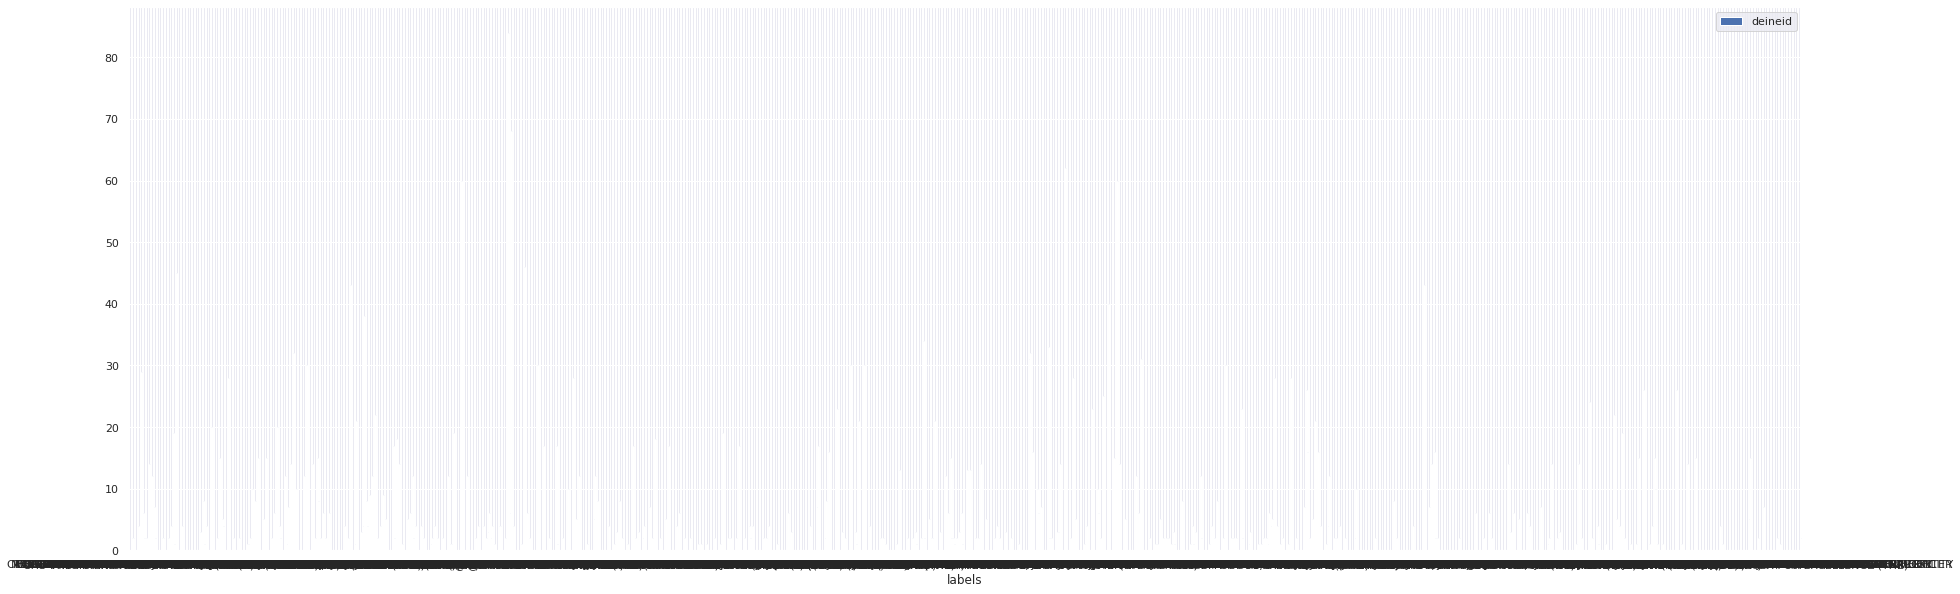

In [69]:
descrete_cols = ['Carrier Code', 'FinancialClass', 'CPT', 'Ordering Clinic']
for col in descrete_cols:
  compareColsWithClaimAcceptance(col)

We can see some fincial class don't have rejections

In [70]:
df[df['accepted'] == True]

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
2,104454,2019-01-02,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,2019-01-07,2019-02-10,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,NaT,NTINC,0.0,0.0,0.0,1,True
3,104496,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-28,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
4,104497,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-01-07,2019-01-30,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,2019-01-08,NTINC,3900.0,0.0,749.0,1,True
7,104500,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,3900.0,CT - CONTRACTED,81420,2019-01-07,2019-01-22,1689184038,"FARO, DR. CONNIE",-,2019-01-08,NTINC,0.0,0.0,749.0,1,True
8,104501,2019-01-02,AETLIF-E,3900.0,0.0,0.0,0.0,3900.0,CT - CONTRACTED,81420,2019-01-07,2019-01-24,1689184038,"FARO, DR. CONNIE",-,2019-01-08,NTINC,0.0,0.0,749.0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10143,353447,2019-01-02,CIG-E,155.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81405,2019-02-06,2019-02-12,1043579808,SPECTRUM WOMEN'S HEALTHCARE,-,2019-02-06,NTINC,0.0,155.0,0.0,1,True
10144,353448,2019-01-02,CIG-E,155.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81405,2019-02-06,2019-02-14,1043579808,SPECTRUM WOMEN'S HEALTHCARE,-,2019-02-06,NTINC,0.0,155.0,0.0,1,True
10145,353449,2019-01-02,CIG-E,4600.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81408,2019-02-06,2019-02-12,1043579808,SPECTRUM WOMEN'S HEALTHCARE,-,2019-02-06,NTINC,0.0,4600.0,0.0,1,True
10146,353450,2019-01-02,CIG-E,4600.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81408,2019-02-06,2019-02-14,1043579808,SPECTRUM WOMEN'S HEALTHCARE,-,2019-02-06,NTINC,0.0,4600.0,0.0,1,True


In [71]:
df[df['accepted'] == False]

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count,accepted
0,104452,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-22,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
1,104453,2019-01-02,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,2019-01-07,2019-01-24,1316428238,ALAMO WOMEN'S OBGYN,197,2019-01-08,NTINC,0.0,3900.0,0.0,1,False
5,104498,2019-01-02,AETLIF-E,4100.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81422,2019-01-07,2019-01-28,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,96,2019-01-08,NTINC,0.0,4100.0,749.0,1,False
6,104499,2019-01-02,AETLIF-E,4100.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81422,2019-01-07,2019-01-30,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,96,2019-01-08,NTINC,0.0,4100.0,749.0,1,False
9,104502,2019-01-02,AETLIF-E,4100.0,0.0,0.0,0.0,3351.0,CT - CONTRACTED,81422,2019-01-07,2019-01-22,1689184038,"FARO, DR. CONNIE",96,2019-01-08,NTINC,0.0,749.0,749.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10152,353571,2019-01-02,MDAL-E,3900.0,0.0,0.0,0.0,0.0,MD - MEDICAID,81420,2019-02-06,2019-02-10,1538688742,EASTERN OB/GYN,16,2019-02-06,NTINC,3900.0,0.0,0.0,1,False
10153,353572,2019-01-02,MDAL-E,4100.0,0.0,0.0,0.0,0.0,MD - MEDICAID,81422,2019-02-06,2019-02-10,1538688742,EASTERN OB/GYN,16,2019-02-06,NTINC,4100.0,0.0,0.0,1,False
10160,364958,2019-01-02,MOLOH-E,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81420,2019-02-07,2019-02-17,1144534322,SOUTHWESTERN OB/GYN,146,2019-02-07,NTINC,3900.0,0.0,0.0,1,False
10355,407676,2019-01-02,BCBSMA-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,2019-02-14,2019-02-17,1295774297,DIMOCK CENTER,32,2019-02-14,NTINC,3900.0,0.0,0.0,1,False
